# Ritz approximation for a discontinuous multiplication operator

In this notebook we show the Ritz approximation of the multiplication operator
$Mf = m(x)f(x)$ on $L^2(0, 1)$, where 
$$
m(x) \mapsto \begin{cases}
x & x < 1/2 \\
x + 1/2 & x > 1/2
\end{cases}
$$

The actual spectrum is $[0, 0.5]\cup[1, 1.5]$, and we will see spectral pollution
in the gap $[0.5, 1]$.

In [2]:
from specpol.ritz import ritz_bounded_L2, mult_sors
from specpol.algebra import create_m_op
from specpol.plot import plot_ritz

from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# the symbol of our multiplication operator, m(x)
def step_slope(x):
    return x if x < 1 / 2 else x + 1 / 2

# `create_m_op` creates a multiplication operator with supplied symbol
step_operator = create_m_op(step_slope)

In [3]:
def plot(ritz_results):
    # here we modify the plot of the approximation to add bands
    # where we expect the spectrum to be

    fig, ax1, ax2 = plot_ritz(ritz_results)
    ax1.axhspan(0, 0.5, facecolor="green", alpha=0.2)
    ax1.axhspan(1, 1.5, facecolor="green", alpha=0.2)
    ax2.axvspan(0, 0.5, facecolor="green", alpha=0.2)
    ax2.axvspan(1, 1.5, facecolor="green", alpha=0.2)

    plt.show()

In [4]:
spec_step_slope = dict()

for i in tqdm(range(50, 175, 25)):
    spec_step_slope[i] = np.linalg.eigvals(ritz_bounded_L2(step_operator, 1, i, 321))

100%|██████████| 5/5 [01:16<00:00, 15.35s/it]


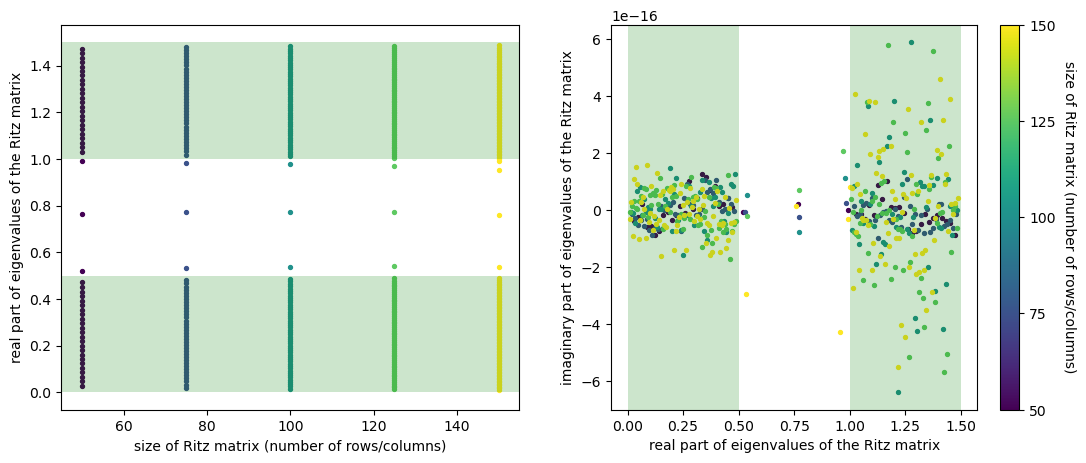

In [5]:
plot(spec_step_slope)

In [9]:
sors = mult_sors(step_slope, 1, 400, 321)

KeyboardInterrupt: 

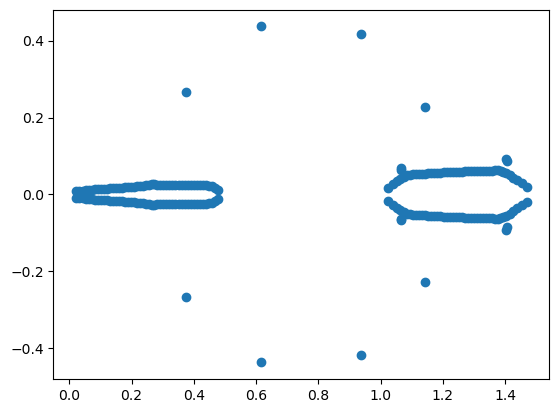

In [ ]:
plt.scatter(sors[0].real, sors[0].imag)